https://huggingface.co/transformers/model_doc/roberta.html#robertaforsequenceclassification

# **1. Cài đặt các thư viện cần thiết**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import re
import unicodedata
from tqdm import tqdm
from tqdm import tqdm_notebook
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!git clone https://github.com/huggingface/transformers
%cd transformers
!pip install transformers

Cloning into 'transformers'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 57388 (delta 2), reused 6 (delta 1), pack-reused 57374
Receiving objects: 100% (57388/57388), 42.77 MiB | 30.35 MiB/s, done.
Resolving deltas: 100% (40249/40249), done.
/content/transformers
     |████████████████████████████████| 1.5MB 12.7MB/s 
     |████████████████████████████████| 2.9MB 59.5MB/s 
     |████████████████████████████████| 890kB 52.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=5f0ba4e82b194cb4476f2d5ac0cd7e66ba556a2e7ce28a3c28bf70b00d6f1d02
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [4]:
!pip install fastBPE
!pip install fairseq

  Created wheel for fastBPE: filename=fastBPE-0.1.0-cp36-cp36m-linux_x86_64.whl size=481514 sha256=0cddbb4ecaca6ae9c2f894938c588bf38c66ab78db43f4bad8212f8baba2943c
  Stored in directory: /root/.cache/pip/wheels/f3/0c/9c/fc62058b4d473a5602bcd3d3edfece796f123875379ea82d79
Successfully built fastBPE
     |████████████████████████████████| 1.7MB 17.1MB/s 
     |████████████████████████████████| 71kB 11.6MB/s 
     |████████████████████████████████| 122kB 35.8MB/s 
     |████████████████████████████████| 112kB 61.6MB/s 
     |████████████████████████████████| 276kB 57.4MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-cp36-none-any.whl size=141231 sha256=0f0b1fbdc4f1e0a54a9f307ba3be17201cbe8fd480c5c37a083867f9e2e34ade
  Stored in directory: /root/.cache/pip/wheels/e3/e2/fa/b78480b448b8579ddf393bebd3f47ee23aa84c89b6a78285c8
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=14a8b45d34248e7dba13d0b1fe830c00410a55

In [5]:
!pip install tqdm

In [6]:
# Install the vncorenlp python wrapper
!pip install vncorenlp

# Download VnCoreNLP-1.1.1.jar & its word segmentation component (i.e. RDRSegmenter) 
!mkdir -p vncorenlp/models/wordsegmenter
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar vncorenlp/ 
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/

     |████████████████████████████████| 2.7MB 20.9MB/s 
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-cp36-none-any.whl size=2645936 sha256=dbd6e20cbbeae5f6b29d1283edafdba13f60c2bab6f5af8857a34cdff22f20c8
  Stored in directory: /root/.cache/pip/wheels/09/54/8b/043667de6091d06a381d7745f44174504a9a4a56ecc9380c54
Successfully built vncorenlp
--2020-12-23 16:07:06--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27412575 (26M) [application/octet-stream]
Saving to: ‘VnCoreNLP-1.1.1.jar’

VnCoreNLP-1.1.1.jar 100%[===================>]  26.14M  --.-KB/s    in 0.1s    

2020-12-23 16:07:06 (256 MB/s) - ‘VnCoreNLP-1.1.1.jar’ saved [27412575/27412575]

--2020-12-23 16:07:06--  http

In [7]:
!nvidia-smi

Wed Dec 23 16:07:07 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Thử thực hiện tách từ cho một câu tiếng Việt đơn giản

In [8]:
from vncorenlp import VnCoreNLP
#rdrsegmenter = VnCoreNLP("/Absolute-path-to/vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') 
rdrsegmenter = VnCoreNLP("/content/transformers/vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') 

text = "Trường Đại học Công nghệ Thông tin"

word_segmented_text = rdrsegmenter.tokenize(text) 
print(word_segmented_text)

[['Trường', 'Đại_học', 'Công_nghệ_Thông_tin']]


Tải và giải nén pre-trained model - PhoBERT_base_transformers

In [9]:
!wget https://public.vinai.io/PhoBERT_base_transformers.tar.gz
!tar -xzvf PhoBERT_base_transformers.tar.gz

--2020-12-23 16:07:19--  https://public.vinai.io/PhoBERT_base_transformers.tar.gz
Resolving public.vinai.io (public.vinai.io)... 52.85.144.21, 52.85.144.72, 52.85.144.49, ...
Connecting to public.vinai.io (public.vinai.io)|52.85.144.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322405979 (307M) [application/x-tar]
Saving to: ‘PhoBERT_base_transformers.tar.gz’

PhoBERT_base_transf 100%[===================>] 307.47M   178MB/s    in 1.7s    

2020-12-23 16:07:22 (178 MB/s) - ‘PhoBERT_base_transformers.tar.gz’ saved [322405979/322405979]

PhoBERT_base_transformers/
PhoBERT_base_transformers/config.json
PhoBERT_base_transformers/bpe.codes
PhoBERT_base_transformers/model.bin
PhoBERT_base_transformers/dict.txt


Load model PhoBERT_base_transformers

In [10]:
from fairseq.data.encoders.fastbpe import fastBPE
from fairseq.data import Dictionary
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--bpe-codes', 
    default="/content/transformers/PhoBERT_base_transformers/bpe.codes",
    required=False,
    type=str,
    help='path to fastBPE BPE'
)
args, unknown = parser.parse_known_args()
bpe = fastBPE(args)

# Load the dictionary
vocab = Dictionary()
vocab.add_from_file("/content/transformers/PhoBERT_base_transformers/dict.txt")

Sử dụng **bpe** để encode 1 câu hay một đoạn văn bản thành một list các subword

In [11]:
bpe.encode('Mừng như thằng nhóc bỗng được mang đến cho thật nhiều hộp quà') #Những chuyện buồn thì buông hết, điều tốt đẹp chớ phai phôi

'Mừng như thằng nhóc bỗng được mang đến cho thật nhiều hộp quà'

Sử dụng **vocab** để ánh xạ ngược từ subword về id của nó trong bộ tự vựng được cung cấp sẵn.

In [12]:
#<s> là token đặc biệt để đánh dấu vị trí đầu câu và </s> để đánh dấu vị trí cuối mỗi câu.
vocab.encode_line('<s> ' + 'Mừng như thằng nhóc bỗng được mang đến cho thật nhiều hộp quà' + ' </s>') #Những chuyện buồn thì buông hết, điều tốt đẹp chớ phai phôi

tensor([    0, 17666,    42,  4028, 10069,  4502,    11,   156,    30,    13,
          520,    36,  2275,  1087,     2,     2], dtype=torch.int32)

Load dataset

In [13]:
# Configuration - please change theses setting compatible with yours
train_sents = pd.read_csv('/content/drive/MyDrive/DS202_L11/Dataset/0_New_dataset/raw_train.csv').title #/content/drive/My Drive/DS202_L11/Dataset/0_Train_Test_Data/
val_sents = pd.read_csv('/content/drive/MyDrive/DS202_L11/Dataset/0_New_dataset/raw_test.csv').title
train_labels = pd.read_csv('/content/drive/MyDrive/DS202_L11/Dataset/0_New_dataset/raw_train.csv').label
val_labels = pd.read_csv('/content/drive/MyDrive/DS202_L11/Dataset/0_New_dataset/raw_test.csv').label

# **2. Tiền xử lý dữ liệu**
 Tiền xử lý dữ liệu bao gồm:
- Chuẩn hóa bảng mã Unicode ( thành Unicode đựng sẵn)
- Chuẩn hóa kiểu gõ dấu tiếng Việt
- Thực hiện tách từ tiếng Việt (sử dụng thư viện tách từ vncorenlp)
- đưa về văn bản lower (viết thường)
- Xóa các ký tự đặc biệt: ".", ",", ";", ")",...
- Xoá khoảng trắng thừa

Cài đặt các hàm tiền xử lý văn bản tên các bài báo.

In [14]:
def convert_unicode(txt):
    txt = unicodedata.normalize('NFC', txt)
    return txt

def text_preprocess(txt):
    # chuẩn hóa unicode
    txt = convert_unicode(txt)
    # chuẩn hóa cách gõ dấu tiếng Việt (òa -> oà, úy -> uý,...) và tách từ
    txt = rdrsegmenter.tokenize(txt)
    txt = ' '.join(' '.join(word for word in sentence) for sentence in txt)
    # đưa về lower
    txt = txt.lower()
    # xóa các ký tự không cần thiết
    txt = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',txt)
    # xóa khoảng trắng thừa
    txt = re.sub(r'\s+', ' ', txt).strip()
    return txt

Tiến hành xử lý các đoạn text tên bài báo.


In [15]:
for i in tqdm_notebook(range(train_sents.shape[0])):
  train_sents[i] = text_preprocess(train_sents[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [16]:
for i in tqdm_notebook(range(val_sents.shape[0])):
  val_sents[i] = text_preprocess(val_sents[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [17]:
stopword = ['bị', 'bởi', 'cả', 'các', 'cái', 'cần', 'càng', 'chỉ', 'chiếc', 'cho', 'chứ', 'chưa', 'chuyện', 'có', 'có_thể', 'cứ', 
            'của', 'cùng', 'cũng', 'đã', 'đang', 'đây', 'để', 'đến_nỗi', 'đều', 'điều', 'do', 'đó', 'được', 'dưới', 'gì', 'khi', 
            'không', 'là', 'lại', 'lên', 'lúc', 'mà', 'mỗi', 'một_cách', 'này', 'nên', 'nếu', 'ngay', 'nhiều', 'như', 'nhưng', 
            'những', 'nơi', 'nữa', 'phải', 'qua', 'ra', 'rằng', 'rất', 'rồi', 'sau', 'sẽ', 'so', 'sự', 'tại', 'theo', 'thì', 'trên', 
            'trước', 'từ', 'từng', 'và', 'vẫn', 'vào', 'vậy', 'vì', 'việc', 'với', 'vừa']

In [18]:
STOPWORDS = '/content/vietnamese-stopwords-dash.txt'

In [19]:
train_sents

0         mon 2k và ngân 98 đôi bạn cùng nổi nhờ khoe ng...
1         hacker được thưởng ô_tô tesla vì xâm_nhập thàn...
2              vũ_khí 1 000 năm_tuổi chôn dưới nghĩa_địa cổ
3         ngồi nhà tự học cách nấu 15 món ăn truyền_thốn...
4         lưu_bích tô_chấn_phong tái_hợp trong ta phụ nh...
                                ...                        
233995    việt_nam phóng vệ_tinh siêu nhỏ nanodragon cuố...
233996    trầm_bê qua_mặt hđqt sacombank cho vay 1 800 t...
233997    clattenburg pha chơi bóng bằng tay của arnold ...
233998    khu nghỉ_dưỡng khoả_thân dè_dặt đón khách trở_...
233999    vợ_chồng hoàng_tử harry bí_mật đi phát bữa ăn ...
Name: title, Length: 234000, dtype: object

In [20]:
with open(STOPWORDS, "r") as ins:
    stopwords = []
    for line in ins:
        dd = line.strip('\n')
        stopwords.append(dd)
    stopwords = set(stopwords)

In [21]:
def filter_stop_words(train_sentences, stop_words):
    new_sent = [word for word in train_sentences.split() if word not in stop_words]
    train_sentences = ' '.join(new_sent)
        
    return train_sentences

In [22]:
def preprocess(text):
    text = filter_stop_words(text, stopwords)
    text = text.lower()
    return text

In [23]:
def pre_process_features(X, y):
    X = [preprocess(str(p)) for p in list(X)]
    for idx, ele in enumerate(X):
        if not ele:
            np.delete(X, idx)
            np.delete(y, idx)
    return X, y

In [24]:
train_X = train_sents
train_y = train_labels.values

dev_X = val_sents
dev_y = val_labels.values

# test_X = test_sents
# test_y = test_labels.values

In [25]:
train_X, train_y = pre_process_features(train_X, train_y)
dev_X, dev_y = pre_process_features(dev_X, dev_y)
#test_X, test_y = pre_process_features(test_X, test_y)


train = pd.DataFrame({'text': train_X, 'labels': train_y})
dev = pd.DataFrame({'text': dev_X, 'labels': dev_y})
#test = pd.DataFrame({'text': test_X, 'labels': test_y})

In [26]:
# for i in tqdm_notebook(range(val_sents.shape[0])):
#   val_sents[i] = remove_stopwords(val_sents[i])

Encode các Label

In [27]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le1.fit(train_labels)
train_labels = le1.fit_transform(train_labels)
print(le1.classes_)

['Công nghệ' 'Du lịch' 'Giáo dục' 'Giải trí' 'Khoa học' 'Kinh doanh'
 'Pháp luật' 'Sức khỏe' 'Thế giới' 'Thể thao' 'Thời sự' 'Xe' 'Đời sống']


In [28]:
le = LabelEncoder()
le.fit(val_labels)
val_labels = le.fit_transform(val_labels)
print(le.classes_)

['Công nghệ' 'Du lịch' 'Giáo dục' 'Giải trí' 'Khoa học' 'Kinh doanh'
 'Pháp luật' 'Sức khỏe' 'Thế giới' 'Thể thao' 'Thời sự' 'Xe' 'Đời sống']


In [29]:
train_labels

array([3, 0, 4, ..., 9, 1, 8])

Sử dụng **bpe** để đưa text đầu vào dưới dạng subword và ánh xạ các subword về dạng index trong từ điển.

In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_LEN = 16

train_ids = []
for sent in train_sents:
    subwords = '<s> ' + bpe.encode(sent) + ' </s>'
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long().tolist()
    train_ids.append(encoded_sent)

val_ids = []
for sent in val_sents:
    subwords = '<s> ' + bpe.encode(sent) + ' </s>'
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long().tolist()
    val_ids.append(encoded_sent)
    
train_ids = pad_sequences(train_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")
val_ids = pad_sequences(val_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")

Tạo một mask để làm đầu vào cho thư viện transformers, mask này cho biết các giá trị nào của chuỗi đã được padding.

In [31]:
train_masks = []
for sent in train_ids:
    mask = [int(token_id > 0) for token_id in sent]
    train_masks.append(mask)

val_masks = []
for sent in val_ids:
    mask = [int(token_id > 0) for token_id in sent]

    val_masks.append(mask)

In [32]:
train_ids[0]

array([    0, 13877,  2326,  1947,     6, 14504,  5859,   464,    88,
          81,   983,   595,  1593,  2112,  5160,  2111])

In [33]:
train_sents[0]

'mon 2k và ngân 98 đôi bạn cùng nổi nhờ khoe ngực phát_ngôn sốc'

Chuyển dữ liệu về tensor và sử dụng DataLoader của torch để tạo dataloader.

In [34]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch

train_inputs = torch.tensor(train_ids)
val_inputs = torch.tensor(val_ids)
train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)
train_masks = torch.tensor(train_masks)
val_masks = torch.tensor(val_masks)

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = SequentialSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=32)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=32)

Load model PhoBERT.

In [35]:
import torch 
cuda_available = torch.cuda.is_available()

In [36]:
from transformers import RobertaForSequenceClassification, RobertaConfig, AdamW, BertForSequenceClassification

config = RobertaConfig.from_pretrained(
    "/content/transformers/PhoBERT_base_transformers/config.json", from_tf=False, num_labels = 13, output_hidden_states=False,
)
BERT_SA = BertForSequenceClassification.from_pretrained(
    "/content/transformers/PhoBERT_base_transformers/model.bin",
    config=config
)
BERT_SA.cuda()

Some weights of the model checkpoint at /content/transformers/PhoBERT_base_transformers/model.bin were not used when initializing BertForSequenceClassification: ['roberta.embeddings.word_embeddings.weight', 'roberta.embeddings.position_embeddings.weight', 'roberta.embeddings.token_type_embeddings.weight', 'roberta.embeddings.LayerNorm.weight', 'roberta.embeddings.LayerNorm.bias', 'roberta.encoder.layer.0.attention.self.query.weight', 'roberta.encoder.layer.0.attention.self.query.bias', 'roberta.encoder.layer.0.attention.self.key.weight', 'roberta.encoder.layer.0.attention.self.key.bias', 'roberta.encoder.layer.0.attention.self.value.weight', 'roberta.encoder.layer.0.attention.self.value.bias', 'roberta.encoder.layer.0.attention.output.dense.weight', 'roberta.encoder.layer.0.attention.output.dense.bias', 'roberta.encoder.layer.0.attention.output.LayerNorm.weight', 'roberta.encoder.layer.0.attention.output.LayerNorm.bias', 'roberta.encoder.layer.0.intermediate.dense.weight', 'roberta.enc

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(64001, 768, padding_idx=0)
      (position_embeddings): Embedding(258, 768)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-05, element

# **3. Huấn luyện mô hình**


In [37]:
# Function to calculate the accuracy of our predictions vs labels
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    #print(pred_flat, ' ', labels_flat)
    F1_score = f1_score(pred_flat, labels_flat, average='macro')
    
    return accuracy_score(pred_flat, labels_flat), F1_score

In [47]:
device = 'cuda'
epochs = 3

param_optimizer = list(BERT_SA.named_parameters())
no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=1e-5, correct_bias=False)

for epoch_i in range(0, epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    total_loss = 0
    BERT_SA.train()
    train_accuracy = 0
    nb_train_steps = 0
    train_f1 = 0
    
    for step, batch in tqdm_notebook(enumerate(train_dataloader)):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        BERT_SA.zero_grad()
        outputs = BERT_SA(b_input_ids, 
            token_type_ids=None, 
            attention_mask=b_input_mask, 
            labels=b_labels)
        loss = outputs[0]
        total_loss += loss.item()
        
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_train_accuracy, tmp_train_f1 = flat_accuracy(logits, label_ids)
        train_accuracy += tmp_train_accuracy
        train_f1 += tmp_train_f1
        nb_train_steps += 1
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(BERT_SA.parameters(), 1.0)
        optimizer.step()
        
    avg_train_loss = total_loss / len(train_dataloader)
    print(" Accuracy: {0:.4f}".format(train_accuracy/nb_train_steps))
    print(" F1 score: {0:.4f}".format(train_f1/nb_train_steps))
    print(" Average training loss: {0:.4f}".format(avg_train_loss))

    print("Running Validation...")
    BERT_SA.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    eval_f1 = 0
    min_eval_accuracy, min_eval_f1 = 0, 0
    for batch in tqdm_notebook(val_dataloader):

        batch = tuple(t.to(device) for t in batch)

        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = BERT_SA(b_input_ids, 
            token_type_ids=None, 
            attention_mask=b_input_mask)
            logits = outputs[0]
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            tmp_eval_accuracy, tmp_eval_f1 = flat_accuracy(logits, label_ids)

            eval_accuracy += tmp_eval_accuracy
            eval_f1 += tmp_eval_f1
            nb_eval_steps += 1

    print(" Accuracy: {0:.4f}".format(eval_accuracy/nb_eval_steps))

    print(" F1 score: {0:.4f}".format(eval_f1/nb_eval_steps))
print("Training complete!")

======== Epoch 1 / 3 ========
Training...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



 Accuracy: 0.8882
 F1 score: 0.8544
 Average training loss: 0.3530
Running Validation...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



 Accuracy: 0.7321
 F1 score: 0.7321
======== Epoch 2 / 3 ========
Training...



 Accuracy: 0.9055
 F1 score: 0.8755
 Average training loss: 0.3001
Running Validation...



 Accuracy: 0.8373
 F1 score: 0.7862
======== Epoch 3 / 3 ========
Training...



 Accuracy: 0.9154
 F1 score: 0.8885
 Average training loss: 0.2683
Running Validation...



 Accuracy: 0.8524
 F1 score: 0.8062
Training complete!


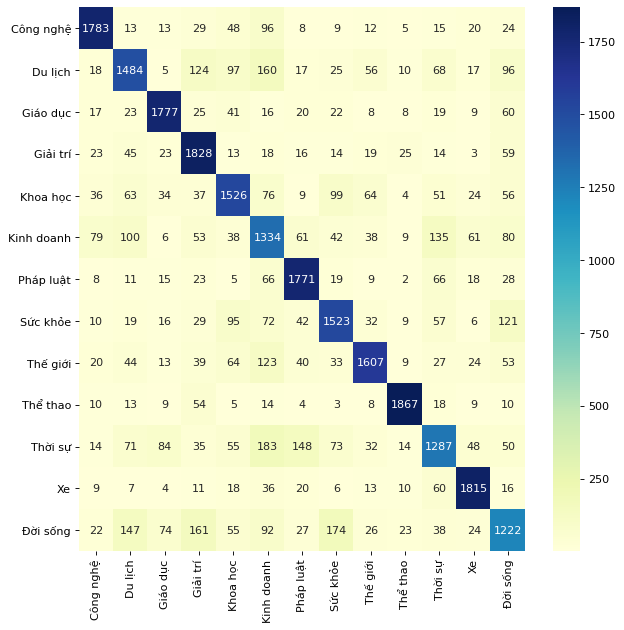

In [46]:
plt.figure(figsize=(9,9), dpi=80)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Công nghệ', 'Du lịch', 'Giáo dục', 'Giải trí', 'Khoa học', 'Kinh doanh', 'Pháp luật', 'Sức khỏe', 'Thế giới', 'Thể thao', 'Thời sự', 'Xe', 'Đời sống'], yticklabels=['Công nghệ', 'Du lịch', 'Giáo dục', 'Giải trí', 'Khoa học', 'Kinh doanh', 'Pháp luật', 'Sức khỏe', 'Thế giới', 'Thể thao', 'Thời sự', 'Xe', 'Đời sống'], cmap='YlGnBu')